In [1]:
# Activity 3.01
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("./CommViolPredUnnormalizedData.txt")
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [7]:
df = df.replace('?', np.NaN)
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79


In [17]:
df['popCount12t21'] = round(df['population'] * (df['agePct12t21']/100), 0)
df['popCount12t29'] = round(df['population'] * (df['agePct12t29']/100), 0)
df['popCount16t24'] = round(df['population'] * (df['agePct16t24']/100), 0)
df['popCount65up'] = round(df['population'] * (df['agePct65up']/100), 0)

In [18]:
df[['population', 'agePct65up','popCount65up']].head()

,population,agePct65up,popCount65up
0,11980,11.33,1357.0
1,23123,17.18,3973.0
2,29344,10.28,3017.0
3,16656,17.57,2926.0
4,11245,12.65,1422.0


In [22]:
df[['popCount12t21', 'popCount12t29', 'popCount16t24', 'popCount65up']].groupby(df['state']).sum()

,popCount12t21,popCount12t29,popCount16t24,popCount65up
state,,,,
AK,39719.0,83022.0,38357.0,10592.0
AL,265311.0,485983.0,255098.0,201557.0
AR,124574.0,232013.0,118195.0,101392.0
AZ,370107.0,740731.0,365428.0,248747.0
CA,3137530.0,6556085.0,3209177.0,2053686.0
CO,268804.0,547548.0,269047.0,183036.0
CT,330014.0,683831.0,333224.0,325011.0
DC,82174.0,181038.0,95223.0,69976.0
DE,5288.0,9516.0,5766.0,2528.0


In [29]:
df.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,popCount12t21,popCount12t29,popCount16t24,popCount65up
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,...,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296,7602.891648,1.526908e+04,7639.470429,5859.082619
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,...,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829,27926.320843,5.872683e+04,28601.047616,22567.037055
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000,631.000000,1.151000e+03,582.000000,237.000000
25%,3.000000,1.436600e+04,2.500000,0.860000,76.320000,0.620000,0.930000,12.250000,24.415000,11.320000,...,7.300000,1181.900000,0.360000,0.000000,0.000000,0.000000,2023.000000,3.772500e+03,1801.500000,1637.500000
50%,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.540000,...,13.700000,2027.300000,1.220000,0.000000,1.000000,2.170000,3210.000000,6.167000e+03,3017.000000,2609.000000
75%,8.000000,4.302400e+04,2.850000,11.145000,96.225000,2.670000,7.810000,15.360000,29.205000,14.345000,...,26.100000,3321.700000,3.365000,0.000000,3.000000,8.365000,6171.000000,1.225700e+04,6083.500000,4836.000000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000,956327.000000,2.010776e+06,958524.000000,850882.000000


In [39]:
cols = ['burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop', 'nonViolPerPop']
pops = ['popCount12t21', 'popCount12t29', 'popCount16t24', 'popCount65up']

df[cols].head()
df[cols] = df[cols].astype('float64')
df[cols].dtypes
#sns.boxplot(y = cols, x = pops, data = df)

burglPerPop        float64
larcPerPop         float64
autoTheftPerPop    float64
arsonsPerPop       float64
nonViolPerPop      float64
dtype: object

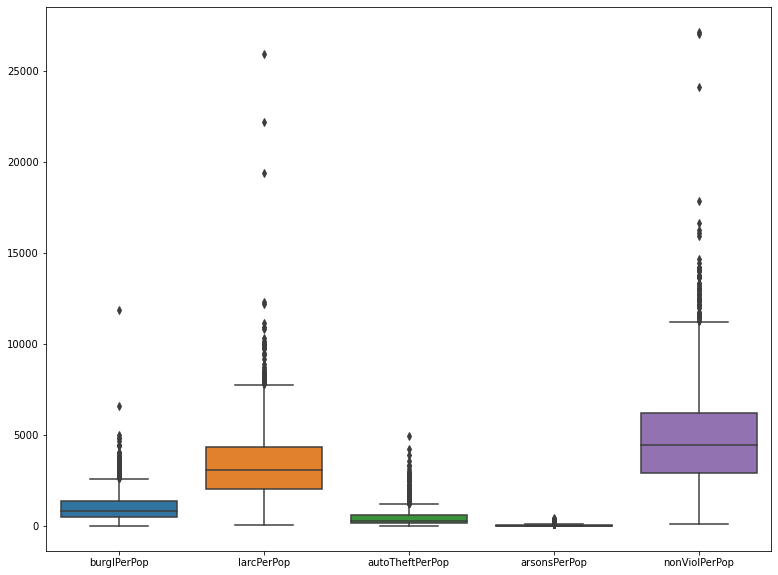

In [43]:
plt.figure(figsize = (13, 10))
sns.boxplot(data = df[cols])
plt.show()

In [47]:
cols = ['PctPopUnderPov','PctLess9thGrade', 'PctUnemployed', 
        'ViolentCrimesPerPop', 'nonViolPerPop']
df['ViolentCrimesPerPop'] = df['ViolentCrimesPerPop'].astype('float64')
df[cols].dtypes

PctPopUnderPov         float64
PctLess9thGrade        float64
PctUnemployed          float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
dtype: object

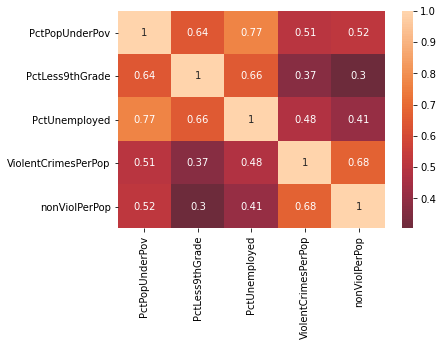

In [48]:
sns.heatmap(df[cols].corr(), center = 0, annot = True)
plt.show()